In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [46]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Define the larger model with more dense layers
model = Sequential([
    Dense(100, input_shape=(784,), activation='relu'),  # First layer with 100 neurons
    Dense(50, activation='relu'),                       # Second layer with 50 neurons
    Dense(25, activation='relu'),                       # Third layer with 25 neurons
    Dense(10, activation='softmax')                     # Output layer with 10 neurons for classification
])

# Build the model
model.build(input_shape=(None, 784))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Save the trained model
model.save('larger_model.h5')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8543 - loss: 0.4874 - val_accuracy: 0.9586 - val_loss: 0.1321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9654 - loss: 0.1152 - val_accuracy: 0.9682 - val_loss: 0.1044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0785 - val_accuracy: 0.9681 - val_loss: 0.1060
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9820 - loss: 0.0582 - val_accuracy: 0.9726 - val_loss: 0.0939
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9844 - loss: 0.0484 - val_accuracy: 0.9765 - val_loss: 0.0863


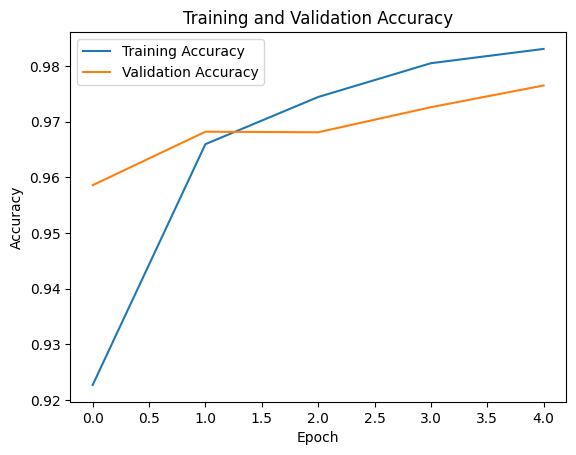

In [48]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

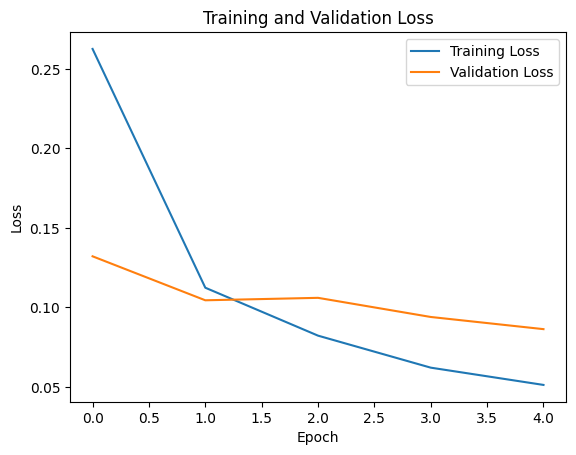

In [49]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [50]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.08628987520933151
Test Accuracy: 0.9764999747276306


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


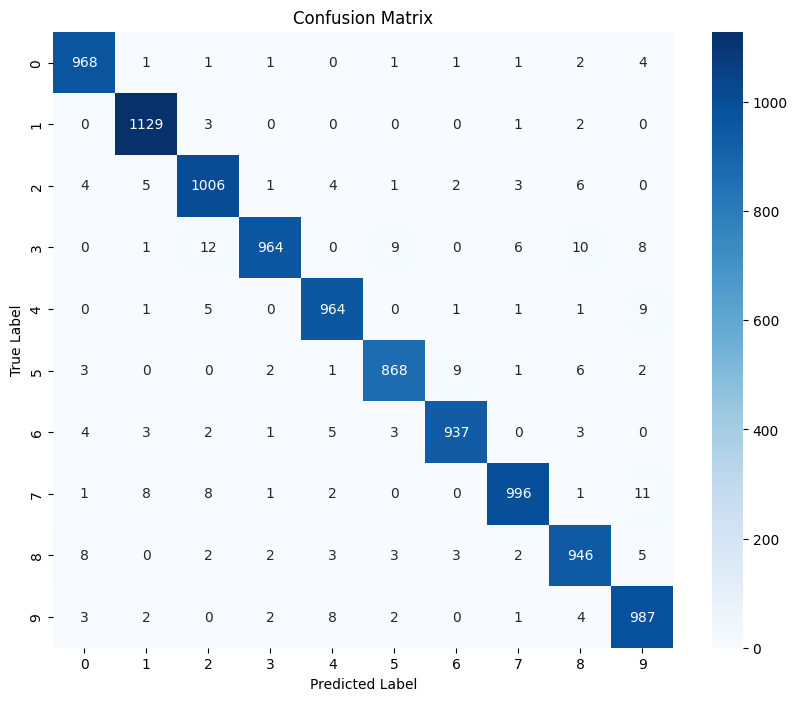

In [51]:
# Generate predictions for the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

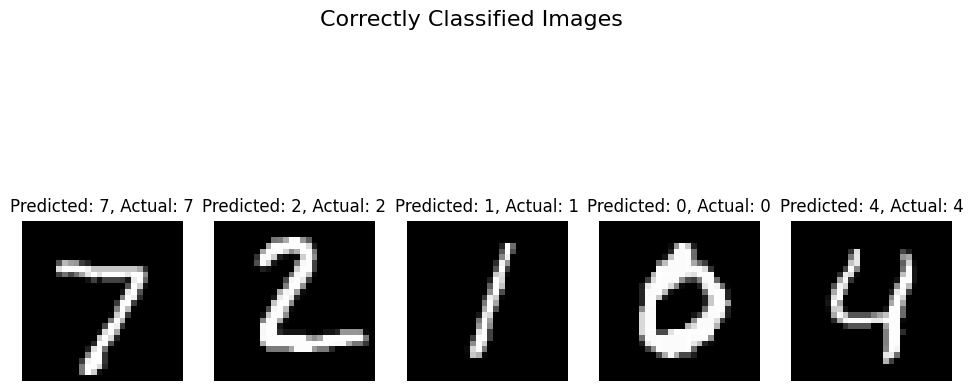

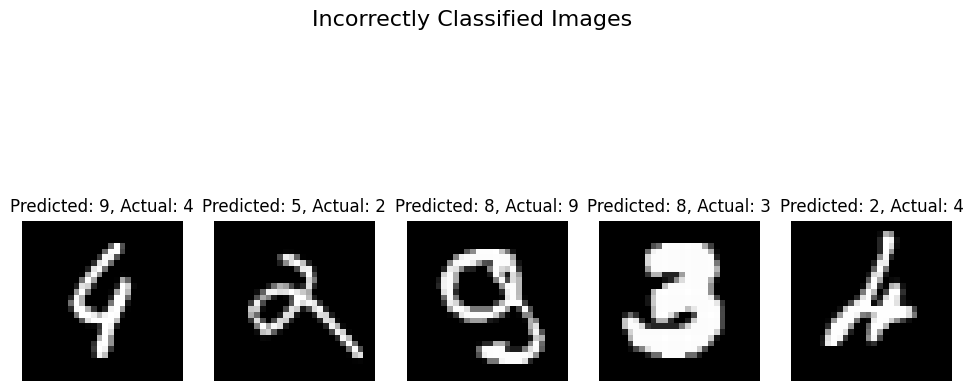

In [52]:
# Display some correctly and incorrectly classified images
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Display correctly classified images
plt.figure(figsize=(12, 6))
plt.suptitle('Correctly Classified Images', fontsize=16)
for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[idx]}, Actual: {y_test[idx]}')
    plt.axis('off')
plt.show()

# Display incorrectly classified images
plt.figure(figsize=(12, 6))
plt.suptitle('Incorrectly Classified Images', fontsize=16)
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[idx]}, Actual: {y_test[idx]}')
    plt.axis('off')
plt.show()

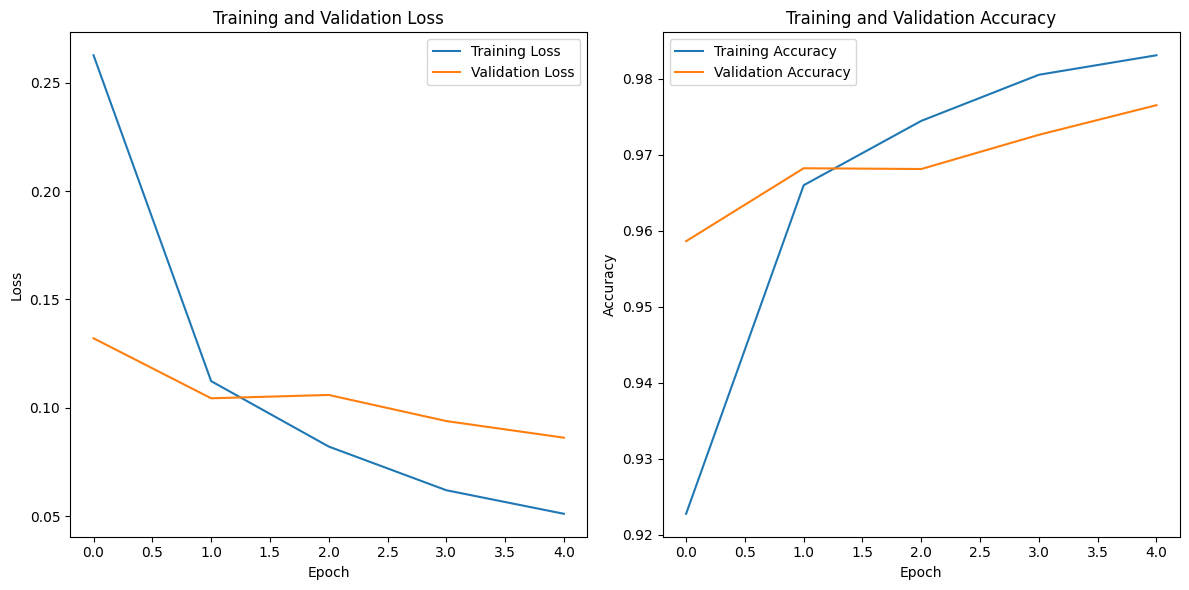

In [53]:
# Learning Curve: Plotting training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.arange(10))

# Compute class-wise precision and recall
precision = dict()
recall = dict()
average_precision = dict()

y_pred_prob = model.predict(x_test)
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_one_hot[:, i], y_pred_prob[:, i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


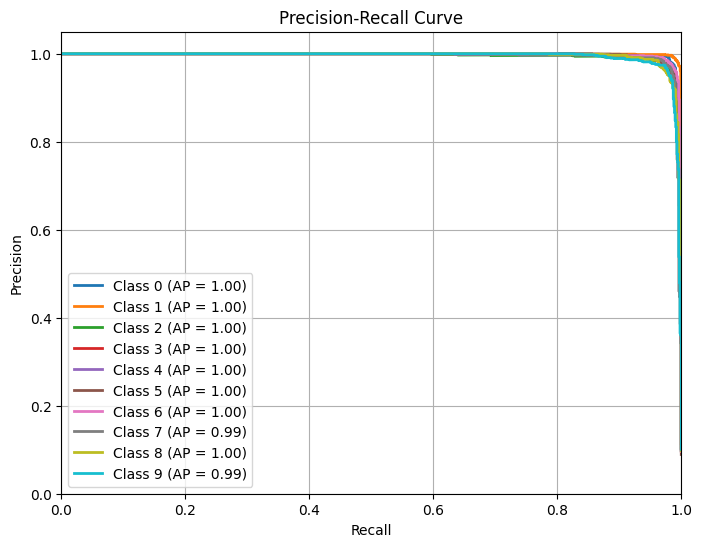

In [55]:
# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

In [56]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.arange(10))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred_prob = model.predict(x_test)
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


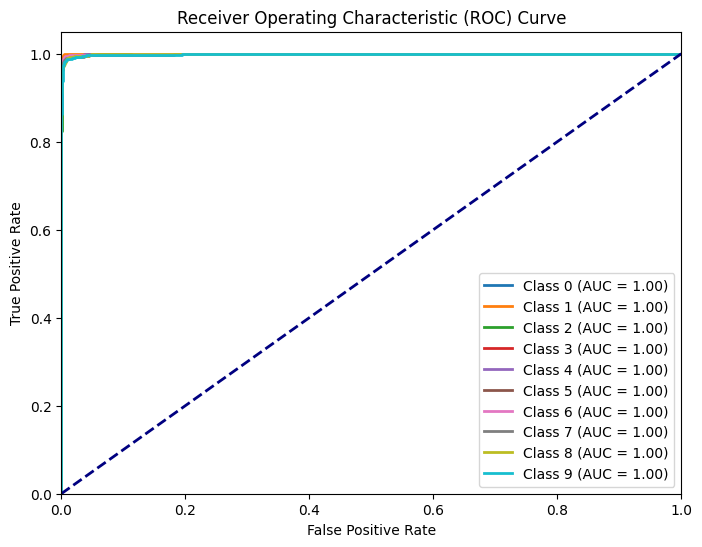

In [57]:
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()